In [2]:
import numpy as np
import cv2 as cv

In [3]:
img = cv.imread('images/Dahyun.jpg')


In [4]:
t1 = cv.getTickCount()
res = cv.resize(img,None,fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC)
#OR
height, width = img.shape[:2]
res1 = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
t2 = cv.getTickCount()
time = (t2-t1)/cv.getTickFrequency()
print(time)

0.014015142680137193


In [9]:
while True:    
    cv.imshow("original image", img)
    cv.imshow("shrinked image", res)
    cv.imshow("zoomed image", res1)
    if cv.waitKey(0) == 27:
        break
cv.destroyAllWindows()

## Translation

In [6]:
img.shape

(960, 960, 3)

In [15]:
rows,cols, _ = img.shape
M = np.float32([[1,0,-300],[0,1,-100]])
dst = cv.warpAffine(img,M,(int(cols/2),int(rows/2)))
#cv.imwrite("Dahyunfocus.jpg", dst)
cv.imshow('Translation',dst)
cv.waitKey(0)
cv.destroyAllWindows()

## Rotation

In [42]:
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('Rotation',dst)
cv.waitKey(0)
cv.destroyAllWindows()

## Affine Transformation

In [43]:
import matplotlib.pyplot as plt

### Inversion using Affline Transform

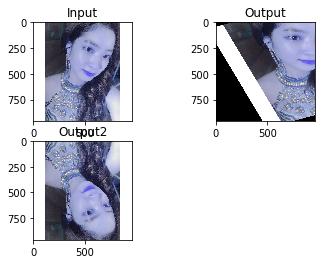

In [53]:
img = cv.imread('images/Dahyun.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
pts3 = np.float32([[0,0],[960,0],[480,960]])
pts4 = np.float32([[0,960],[960, 960],[480,0]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
M1 = cv.getAffineTransform(pts3,pts4)
dst1 = cv.warpAffine(img,M1,(cols,rows))
plt.subplot(221),plt.imshow(img),plt.title('Input')
plt.subplot(222),plt.imshow(dst),plt.title('Output')
plt.subplot(223),plt.imshow(dst1),plt.title('Output2')
plt.show()

## Perspective Transformation

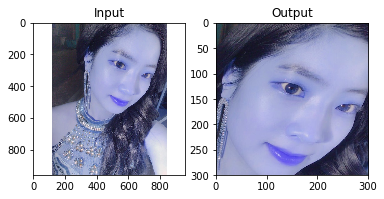

In [62]:
img = cv.imread('images/dahyun.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[270,0],[780,0],[350,560],[780,560]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
cv.imwrite("images/DahyunFocusPerspective.jpg", dst)
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()